In [6]:
#import scipy as sp
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
from pathlib import Path
from pathlib import Path
import os
import os.path
import math
import pandas as pd

In [20]:
#setting file path, print spect single file
#e.g.# data_folder = Path("source_data/text_files/")
data_folder = Path(r"C:/Users/haarsmter/Documents/tweetynet_test_hornb/recording120324M/train/voor test")
#load audiofile
filename= 'SMM10537_20240312_143603.wav' #3wavs concatenated
#load csv file with annotations with onset and offset times
#csvname  = pd.read_csv(os.path.join(data_folder, "gy6or6_baseline_220312_0836.3.wav.csv"), usecols=[0,1,2], header=None) #only first csv for now =first 9sec
csvname  = pd.read_csv(os.path.join(data_folder, "SMM10537_20240312_143603.wav.csv")) #only first csv for now =first 9sec

In [21]:
csvname.head()

,onset_s,label,offset_s
0,367.819156,n,367.865025
1,367.865025,n,367.933829
2,372.105654,n,372.174458
3,372.174458,n,372.245810
4,373.850833,n,373.911992


In [31]:
def printspecchunk (file, xr, xl, sample_x, sample_y):
   # sample_rate, samples = wavfile.read(os.path.join(data_folder, file)) #reads audiofile
    #frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate) #gets times frequecies and spectrogram
    
    plt.figure(figsize=(15,3))    
    plt.pcolormesh(times, frequencies, np.log(spectrogram))
    plt.ylim(top=5000) 
    plt.xlim(right=xr)  # adjust the right leaving left unchanged
    plt.xlim(left=xl)  # adjust the left leaving right unchanged
    plt.ylabel('Freq [Hz]', size=8)
    plt.xlabel('Time [sec]', size=8)
    plt.xticks(size=6)
    for a in sample_x:
        plt.axvline(x=a, linewidth=0.5, color='r') # vertical red line for onset
    for b in sample_y:
        plt.axvline(x=b, linewidth=0.5, color='b') #vertical blue line for offset
    plt.show()

In [42]:
# t = times of audio
# fr = frequencies of audio
# sp = spectrogram of audio (preferaby log of spect
# xl = Left boundary of annotation
# xr = Right boundary of annotation
# onset = column with onset times of annotations
# offset = column with offset times of annotations

def printspecchunk (t, fr, sp, xr, xl, onset, offset):
   # sample_rate, samples = wavfile.read(os.path.join(data_folder, file)) #reads audiofile
    #frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate) #gets times frequecies and spectrogram
    
    plt.figure(figsize=(15,3))    
    #logspec= np.log(spectrogram)
   # plt.pcolormesh(times, frequencies, np.log(spectrogram))
    plt.pcolormesh(t, fr, sp)
    plt.ylim(top=5000) 
    plt.xlim(right=xr)  # adjust the right leaving left unchanged
    plt.xlim(left=xl)  # adjust the left leaving right unchanged
    plt.ylabel('Freq [Hz]', size=8)
    plt.xlabel('Time [sec]', size=8)
    plt.xticks(size=6)
    for a in onset:
        plt.axvline(x=a, linewidth=0.5, color='r') # vertical red line for onset
    for b in offset:
        plt.axvline(x=b, linewidth=0.5, color='b') #vertical blue line for offset
    plt.show()

In [40]:
sample_rate, samples = wavfile.read(os.path.join(data_folder, filename))
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate) #gets times frequecies and spectrogram
dur=times[(len(times)-1)] #250
chunks=(math.ceil(dur/10)) # determine how many chunks of 10 secondes and round up (ceil)
#250/10 =25 chunks
chunks
# warning "WavFileWarning: Chunk (non-data) not understood, skipping it." can be ignored. something about metadata we dont need https://stackoverflow.com/questions/14321627/scipy-io-wavfile-gives-wavfilewarning-chunk-not-understood-error

C:\Users\haarsmter\AppData\Local\Temp\ipykernel_50068\523955062.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, samples = wavfile.read(os.path.join(data_folder, filename))


180

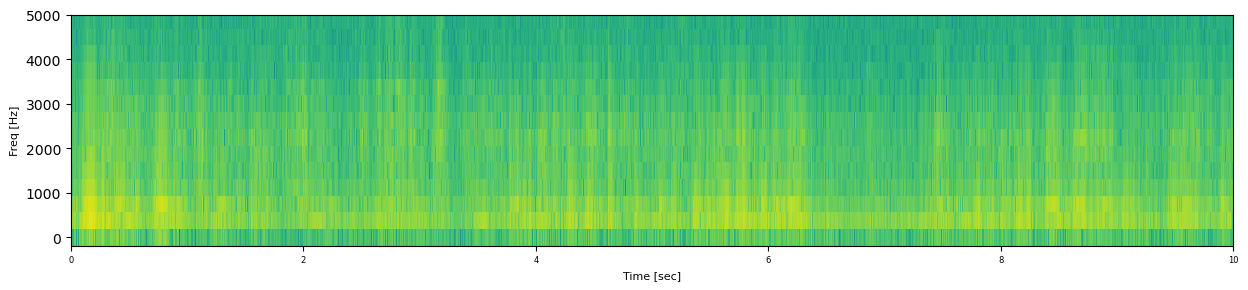

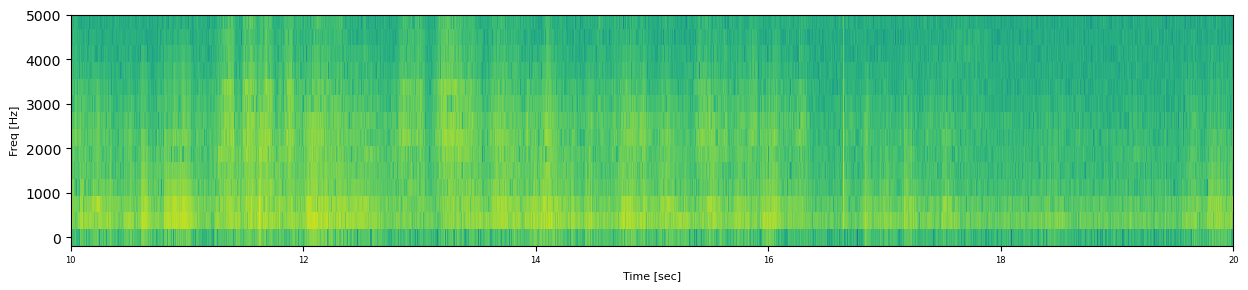

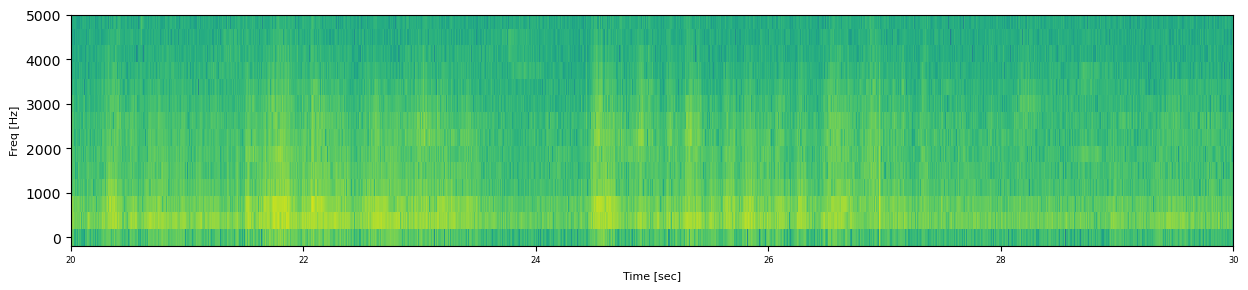

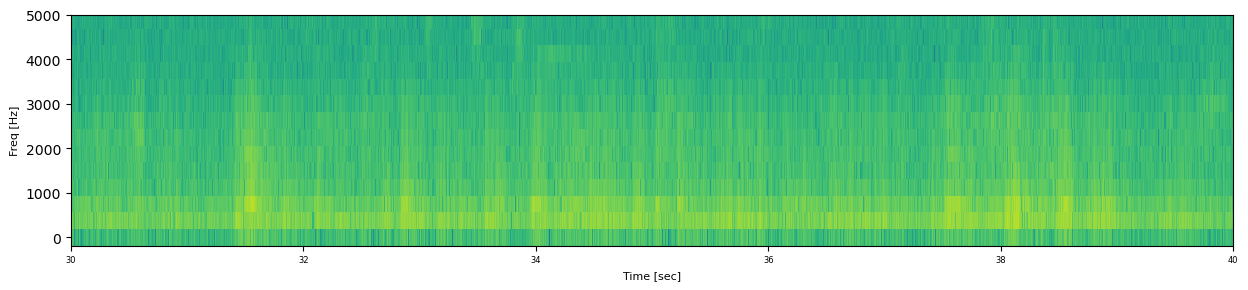

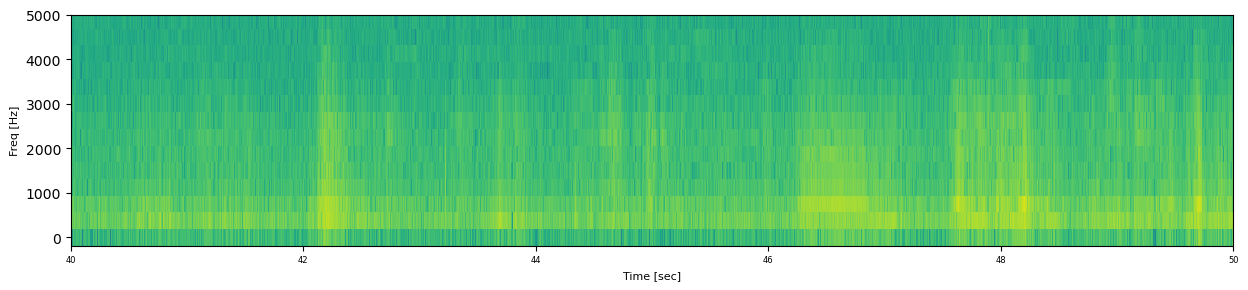

MemoryError: Unable to allocate 2.96 GiB for an array with shape (129, 770142, 4) and data type float64

<Figure size 1500x300 with 1 Axes>

MemoryError: Unable to allocate 758. MiB for an array with shape (129, 770143) and data type float64

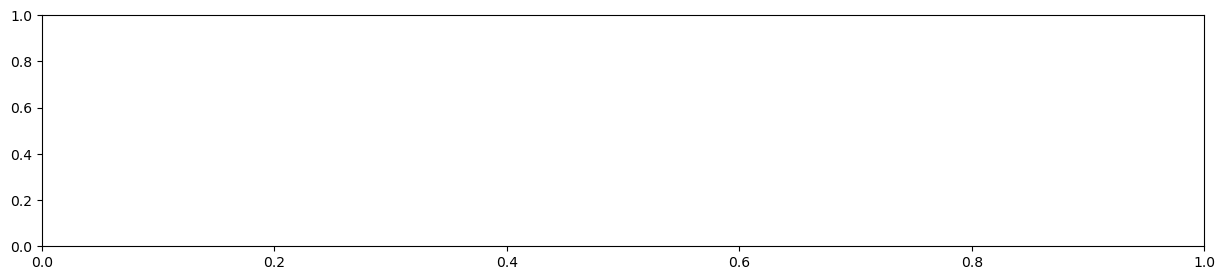

In [43]:
#plot in chunks of 10 seconds
logspec= np.log(spectrogram)
for i in range(1, chunks):
    xr=i*10 # right boundary of xaxis
    xl=xr-10 # left boundary of xaxis
    #printspecchunk(filename, xr, xl, csvname.onset_s, csvname.offset_s)
    printspecchunk(times, frequencies, logspec, xr, xl, csvname.onset_s, csvname.offset_s)

In [ ]:
def splitintochunks (file):
    sample_rate, samples = wavfile.read(os.path.join(data_folder, file)) #reads audiofile
    frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate) #gets times frequecies and spectrogram
   while times < 10 

In [ ]:
sample_rate, samples = wavfile.read(os.path.join(data_folder, filename)) #reads audiofile
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate) #gets times frequecies and spectrogram

#times is in seconds
times[(len(times)-1)]

In [ ]:
len(samples)

In [25]:
#omhoog afronden
print(math.ceil(4.2))

5


C:\Users\haarsmter\AppData\Local\Temp\ipykernel_46248\4046508702.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, samples = wavfile.read(os.path.join(data_folder, file)) #reads audiofile


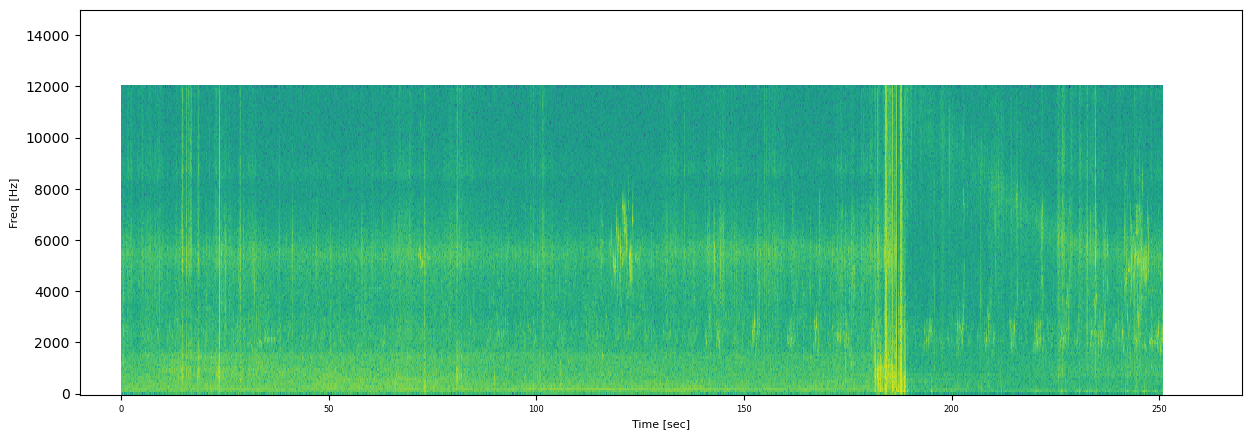

In [14]:
printspec(filename)

In [6]:
plt.show()

In [ ]:
SMM10537_20230515_120749

In [ ]:
#from other script
def printspec (filename, sample_x, sample_y):
    sample_rate, samples = wavfile.read(os.path.join(data_path, filename))
    frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)
    
    plt.figure(figsize=(5,3)) 
    plt.figure(figsize=(max(times)*2,3))
    plt.pcolormesh(times, frequencies, np.log(spectrogram))
    plt.ylim(top=15000) 
    plt.ylabel('Freq [Hz]', size=7)
    plt.xlabel('Time [ms]', size=7)
    plt.xticks(size=6)
    for a in sample_x:
        plt.axvline(x=a, linewidth=0.5, color='r')
    for b in sample_y:
        plt.axvline(x=b, linewidth=0.5, color='b')
    plt.show()

In [9]:
def printspec (file):
    sample_rate, samples = wavfile.read(os.path.join(data_folder, file)) #reads audiofile
    frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate) #gets times frequecies and spectrogram
    
    plt.figure(figsize=(15,5))    
    plt.pcolormesh(times, frequencies, np.log(spectrogram))
    plt.ylim(top=15000) 
    plt.xlim(right=270)  # adjust the right leaving left unchanged
    plt.xlim(left=-10)  # adjust the left leaving right unchanged
    plt.ylabel('Freq [Hz]', size=8)
    plt.xlabel('Time [sec]', size=8)
    plt.xticks(size=6)
    plt.show()